In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Load the dataset
df = pd.read_csv('box_office_data.csv')  # Replace with your actual file name
df.columns = df.columns.str.strip()
print("Columns in df:", df.columns.tolist())

Columns in df: ['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %', '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count', 'Original_Language', 'Production_Countries']


In [13]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing target values
df = df.dropna(subset=['$Worldwide'])

# Fill or drop other missing values as appropriate
df = df.dropna()

In [15]:
# Define target variable
y = df['$Worldwide']

# Define features
X = df[['Year', 'Genres', 'Rating', 'Vote_Count', 'Original_Language', 'Production_Countries']]

In [17]:
# Identify numerical and categorical columns
numerical_features = ['Year', 'Vote_Count']
categorical_features = ['Genres', 'Rating', 'Original_Language', 'Production_Countries']

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Create a pipeline that combines preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Vote_Count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genres', 'Rating',
                                                   'Original_Language',
                                                   'Production_Countries'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [25]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.8858819665049756e+16
R² Score: 0.52785073475791


In [27]:
# Sample inputs for reference:
# 1. 1998,Romance,R,12,en,South Africa
# 2. 2012,Action,PG-13,50000,en,United States
# 3. 2005,Comedy,G,230,en,India
user_input = input("Enter values as Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries:\n")

# Parse the input string
values = user_input.split(",")

# Ensure we have all required fields
if len(values) != 6:
    print("Invalid input. Please enter exactly 6 comma-separated values.")
else:
    # Create DataFrame
    new_data = pd.DataFrame([{
        'Year': int(values[0]),
        'Genres': values[1],
        'Rating': values[2],
        'Vote_Count': int(values[3]),
        'Original_Language': values[4],
        'Production_Countries': values[5]
    }])
# Predict
predicted_revenue = model.predict(new_data)
print(f'Predicted Worldwide Revenue: ${predicted_revenue[0]:,.2f}')

Enter values as Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries:
 2012,Action,PG-13,50000,en,United States


Predicted Worldwide Revenue: $806,454,540.54


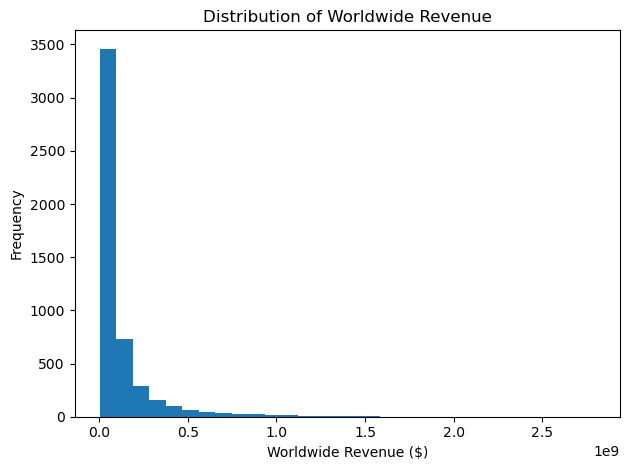

In [37]:
# ── Visual 1: Distribution of Worldwide Revenue ───────────────────────────────────
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['$Worldwide'], bins=30)
plt.title('Distribution of Worldwide Revenue')
plt.xlabel('Worldwide Revenue ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

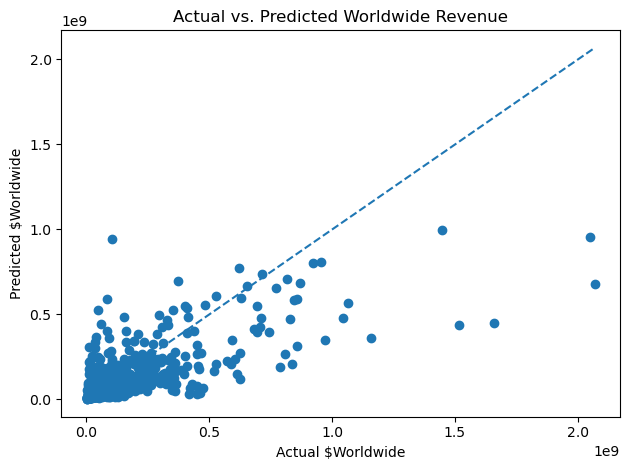

In [39]:
# ── Visual 2: Actual vs. Predicted Worldwide Revenue ─────────────────────────────
y_pred = model.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred)
# perfect-prediction 45° line
minv, maxv = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--')
plt.title('Actual vs. Predicted Worldwide Revenue')
plt.xlabel('Actual $Worldwide')
plt.ylabel('Predicted $Worldwide')
plt.tight_layout()
plt.show()

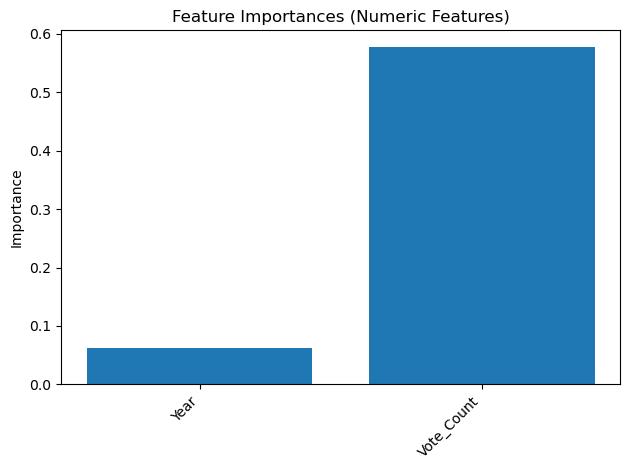

In [41]:
# ── Visual 3: Feature Importances (Year vs. Vote_Count) ───────────────────────────
# RandomForestRegressor importances: first two entries correspond to ['Year','Vote_Count']
importances = model.named_steps['regressor'].feature_importances_[:len(numerical_features)]

plt.figure()
plt.bar(numerical_features, importances)
plt.title('Feature Importances (Numeric Features)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()